# Collection of Statistical Tools

In [2]:
# run the cell
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

## Generating (pseudo-)random numbers in NumPy arrays

Generating 20 integer __completely__ random numbers from 1 to 10

In [3]:
np.random.randint(low = 1, high = 11, size = 20)

array([4, 2, 2, 3, 2, 4, 7, 1, 9, 9, 3, 6, 8, 6, 7, 3, 7, 1, 3, 2])

Generating 20 integer __pseudo__-random numbers from 1 to 10, with a given seed (say, 123)

In [4]:
np.random.seed(123)
np.random.randint(low = 1, high = 11, size = 20)

array([ 3,  3,  7,  2,  4, 10,  7,  2,  1,  2, 10,  1,  1, 10,  4,  5,  1,
        1,  5,  2])

Generate 20 __pseudo__ random numbers from a __normal distribution__ with mean $\mu = 75$ set by 'loc' and std $\sigma = 5$ set by 'scale'

In [5]:
np.random.seed(123)
np.random.normal(loc = 75, scale = 5, size = 20)

array([69.57184698, 79.98672723, 76.41489249, 67.46852643, 72.10699874,
       83.25718269, 62.86660378, 72.85543686, 81.32968129, 70.66629799,
       71.60556924, 74.52645516, 82.45694813, 71.80549002, 72.7800902 ,
       72.82824362, 86.02965041, 85.93393044, 80.02026949, 76.930932  ])

## Normal (Gaussian) distribution

We now generate a pseudo-random Gaussian population 'pop' with given mean and standard deviation. The number of elements is given by size.

In [6]:
mu = 100 #mean
sigma = 2 #std
size = 1000000

np.random.seed(123)
pop = np.random.normal(loc = mu, scale = sigma, size = size)

One can check the mean and the standard deviation are better and better if we increase the population size:

In [7]:
print("pop mean:",np.mean(pop),"   ", "pop std:",np.std(pop))

pop mean: 100.00125900261469     pop std: 2.0005171072042


## Statistical info on the population

In [8]:
stats.describe(pop)

DescribeResult(nobs=1000000, minmax=(90.78574017842989, 109.25515988525538), mean=100.00125900261469, variance=4.00207269828936, skewness=0.00022861550247834481, kurtosis=-0.005837588254301362)

Note that the Fisher (or excess) Kurtosis $\gamma_2$ is used by default. 
It is defined in terms of the Pearson (or absolute) Kurtosis $\beta_2$ as:
\begin{equation}
\gamma_2 = \beta_2 - 3 \, . 
\end{equation}
For the Gaussian distribution $\gamma_2 = 0$. 

You can also compute all the quantities using np or  stats:

In [9]:
len(pop) , np.min(pop) , np.max(pop) , np.mean(pop) , np.var(pop) , np.std(pop) , stats.skew(pop)

(1000000,
 90.78574017842989,
 109.25515988525538,
 100.00125900261469,
 4.002068696216662,
 2.0005171072042,
 0.00022861550247834481)

In [10]:
stats.kurtosis(pop)

-0.005837588254301362

In [11]:
stats.kurtosis(pop, fisher = False)

2.9941624117456986

# Central Limit Theorem: definition and applications

## Central Limit Theorem (à la Lindeberg-Lévy)

Consider a sequence of i.i.d random variables $\{X_i\}_{i = 1, \dots , n}$ with expectation value $\mathbb{E}[X_i] = \mu, \, \forall i = 1, \dots,n$ and finite variance $\text{Var}[X_i] = \sigma^2 < \infty \, \forall i = 1, \dots,n$. Then, as $n \to \infty$, the random variables
\begin{equation}
\sqrt{n} \left( \bar{X} - \mu\right) \, , \qquad \bar{X} = \frac{1}{n} \sum_{i=1}^n X_i \, , 
\end{equation}
converge (in distribution) to a normal distribution $\mathcal{N}(0,\sigma^2)$.

## Preliminaries for the applications

In [12]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

def f_sample_means(pop, sample_size , sim):
    """
    Given a population "pop" (usually randomly created numbers with maybe some distribution) 
    you randomly choose (say, with replacement) a sample with a given size "sample_size" 
    and you do this a "sim" number of times and for each simulation, you compute the mean
    """
    sample_means = []
    for i in range(sim):
        sample_means.append(np.random.choice(pop, sample_size, replace = True).mean()) 
    return sample_means

In [14]:
#def f_sample_means_alex(gen, sim):
#    sample_means = []
#    for i in range(sim):
#        sample_means.append(gen().mean()) 
#    return sample_means

#sample_means_alex = f_sample_means_alex(lambda: np.random.uniform(low = 0.0, high = 10.0, size = 10), 100)

#a = lambda x: x**2
#a(3)

## Central Limit Theorem for Uniform Distribution

In [15]:
pop_size = 1000000
np.random.seed(123)
pop_uniform = np.random.uniform(low = 0.0, high = 10.0, size = pop_size)
#pop_uniform

In [16]:
sample_means_uniform = f_sample_means(pop = pop_uniform, sample_size = 1000, sim = 10000)
stats.describe(sample_means_uniform)

#sample_means_alex = f_sample_means_alex(lambda: ( np.random.uniform(low = 0.0, high = 10.0, size = 1000)), 10000)
#stats.describe(sample_means_alex)

print(stats.describe(sample_means_uniform))
#print(stats.describe(sample_means_alex))

DescribeResult(nobs=10000, minmax=(4.6808795752177, 5.364633522347536), mean=4.999502566355456, variance=0.008312737223232381, skewness=0.007404436926102928, kurtosis=-0.02341190881989519)


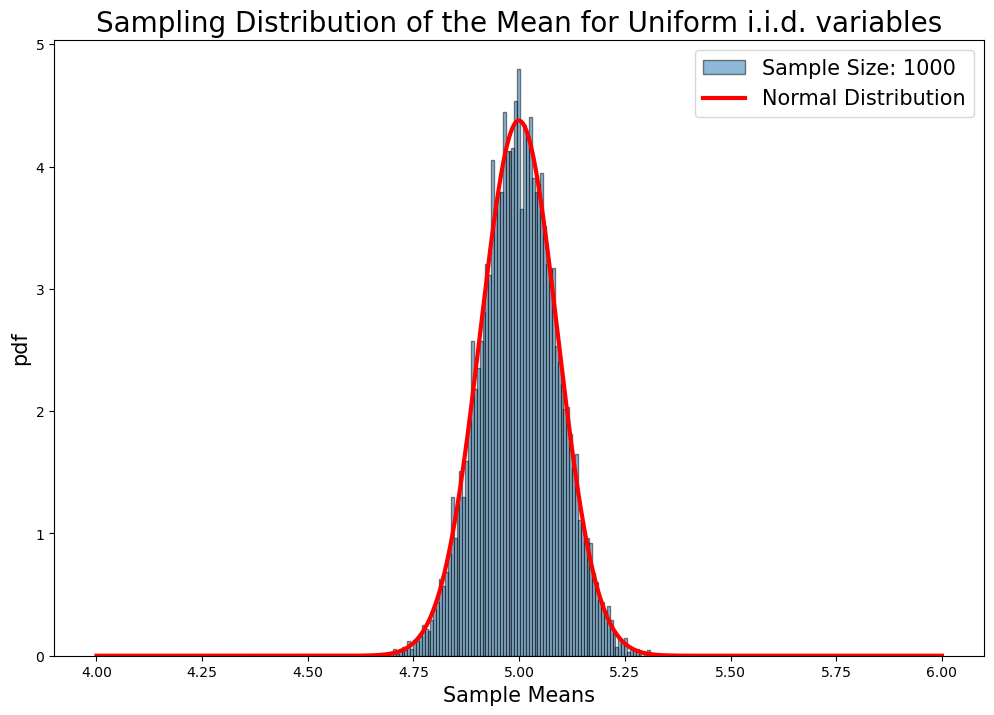

In [17]:
x = np.linspace(4, 6, 10000)
y = stats.norm.pdf(x, loc = np.mean(pop_uniform), scale = np.std(sample_means_uniform))

plt.figure(figsize = (12, 8))
plt.hist(sample_means_uniform, bins = 100, alpha = 0.5, label = "Sample Size: 1000", density= True,ec = "black")
plt.plot(x, y, color = "red", linewidth = 3, label = "Normal Distribution")
plt.title("Sampling Distribution of the Mean for Uniform i.i.d. variables", fontsize = 20)
plt.xlabel("Sample Means", fontsize = 15)
plt.ylabel("pdf", fontsize = 15)
plt.legend(fontsize = 15)
plt.show()

## Central Limit Theorem for Exponential Distribution

The probability density function that NumPy uses is

\begin{equation}
f\left(x; \frac{1}{\beta}\right) = \frac{1}{\beta} \exp\left(-\frac{x}{\beta}\right) \, , 
\end{equation}

for $x > 0$ and 0 elsewhere. Here $\beta$ is the scale parameter,
which is the inverse of the rate parameter $\lambda = 1/\beta$.
The rate parameter is an alternative, widely used parameterization
of the exponential distribution

In [18]:
pop_size = 1000000
np.random.seed(123)
pop_exp = np.random.exponential(scale = 1.0, size = pop_size)

In [19]:
sample_means_exp = f_sample_means(pop = pop_exp, sample_size = 1000, sim = 10000)
stats.describe(sample_means_exp)

DescribeResult(nobs=10000, minmax=(0.8918378923838616, 1.1342405917274072), mean=0.9992645955402025, variance=0.001013650631656915, skewness=0.08033811082321012, kurtosis=-0.03463984058739822)

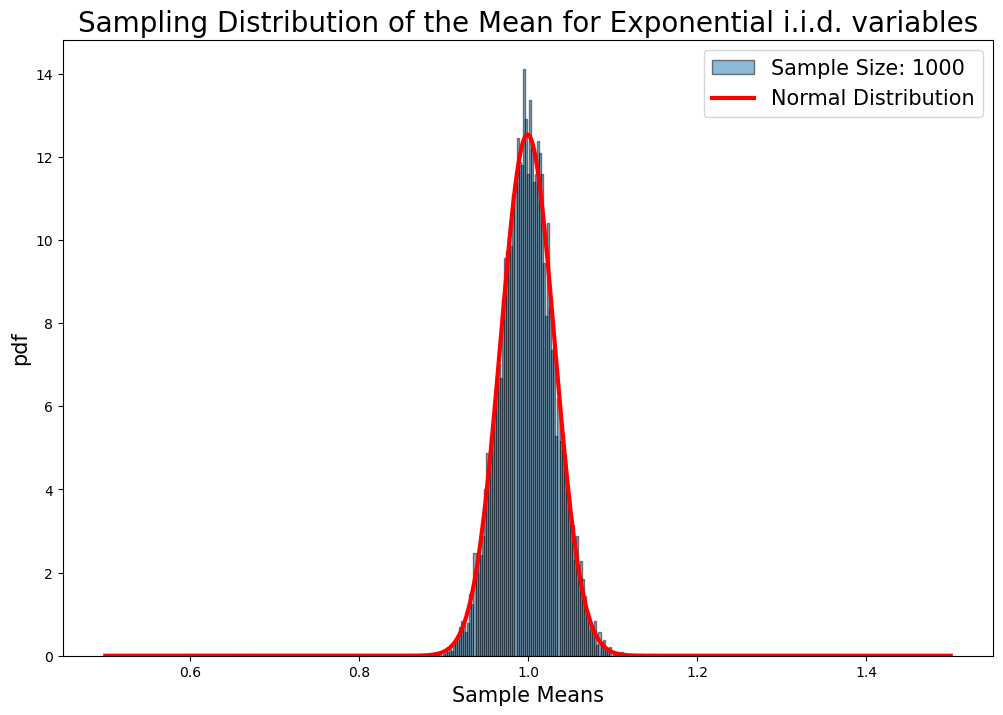

In [20]:
x = np.linspace(0.5, 1.5, 10000)
y = stats.norm.pdf(x, loc = np.mean(pop_exp), scale = np.std(sample_means_exp))

plt.figure(figsize = (12, 8))
plt.hist(sample_means_exp, bins = 100, alpha = 0.5, label = "Sample Size: 1000", density= True,ec = "black")
plt.plot(x, y, color = "red", linewidth = 3, label = "Normal Distribution")
plt.title("Sampling Distribution of the Mean for Exponential i.i.d. variables", fontsize = 20)
plt.xlabel("Sample Means", fontsize = 15)
plt.ylabel("pdf", fontsize = 15)
plt.legend(fontsize = 15)
plt.show()

## Central Limit Theorem for Lorentz Distribution

\begin{equation}
f(x; x_0, \gamma) = \frac{1}{\pi \gamma \left[ 1+
          \left(\dfrac{x-x_0}{\gamma}\right)^2 \right] }
\end{equation}

and the Standard Cauchy distribution just sets $x_0=0$ and $\gamma=1$.

In [21]:
pop_size = 1000000
np.random.seed(123)
pop_lor = np.random.standard_cauchy(pop_size)

In [22]:
sample_means_lor = f_sample_means(pop = pop_lor, sample_size = 1000, sim = 10000)
stats.describe(sample_means_lor)

DescribeResult(nobs=10000, minmax=(-649.0587354532321, 326.37222606519225), mean=-1.4626977799217646, variance=949.3753148402308, skewness=-12.34179526584992, kurtosis=277.5995917625639)

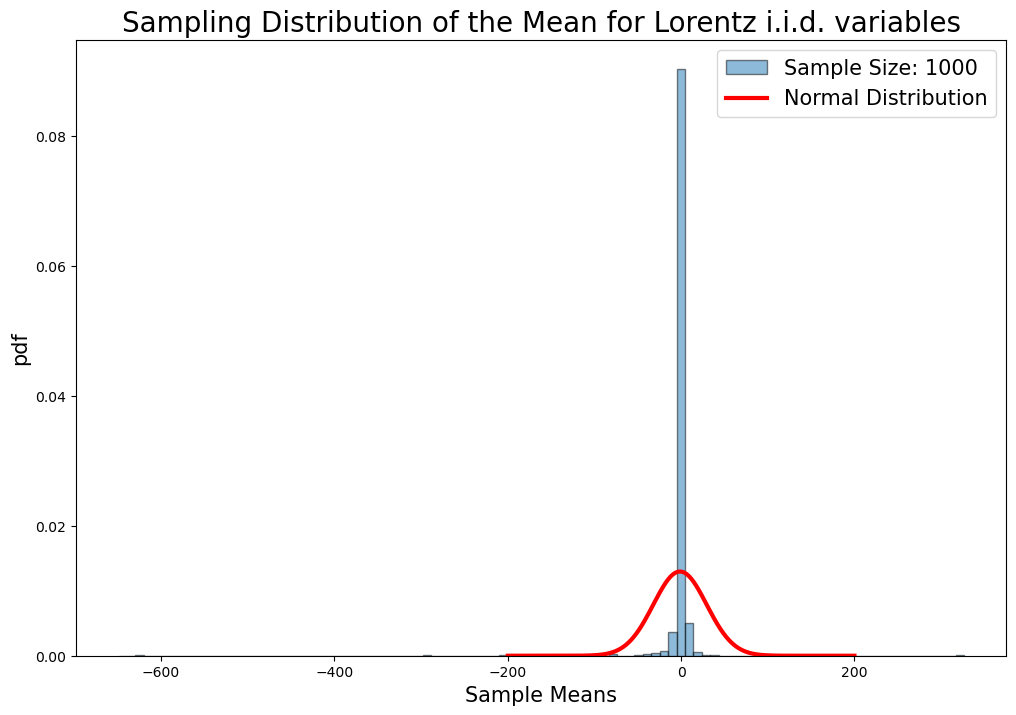

In [23]:
x = np.linspace(-200, 200, 10000)
y = stats.norm.pdf(x, loc = np.mean(pop_lor), scale = np.std(sample_means_lor))

plt.figure(figsize = (12, 8))
plt.hist(sample_means_lor, bins = 100, alpha = 0.5, label = "Sample Size: 1000", density= True,ec = "black")
plt.plot(x, y, color = "red", linewidth = 3, label = "Normal Distribution")
plt.title("Sampling Distribution of the Mean for Lorentz i.i.d. variables", fontsize = 20)
plt.xlabel("Sample Means", fontsize = 15)
plt.ylabel("pdf", fontsize = 15)
plt.legend(fontsize = 15)
plt.show()

Note how the distribution is degenerate: the variance of the __POPULATION__ (already!) is infinite! It doesn't obey the CLT.

## Central Limit Theorem for Other Distributions

In [24]:
pop_size = 1000000
np.random.seed(123)
pop_binom = np.random.binomial(n = 10, p = 0.5, size = pop_size)

In [25]:
sample_means_binom = f_sample_means(pop = pop_binom, sample_size = 1000, sim = 10000)
stats.describe(sample_means_binom)

DescribeResult(nobs=10000, minmax=(4.822, 5.195), mean=5.0001576000000005, variance=0.0024973230945494543, skewness=0.013348560979414349, kurtosis=5.010065936961183e-05)

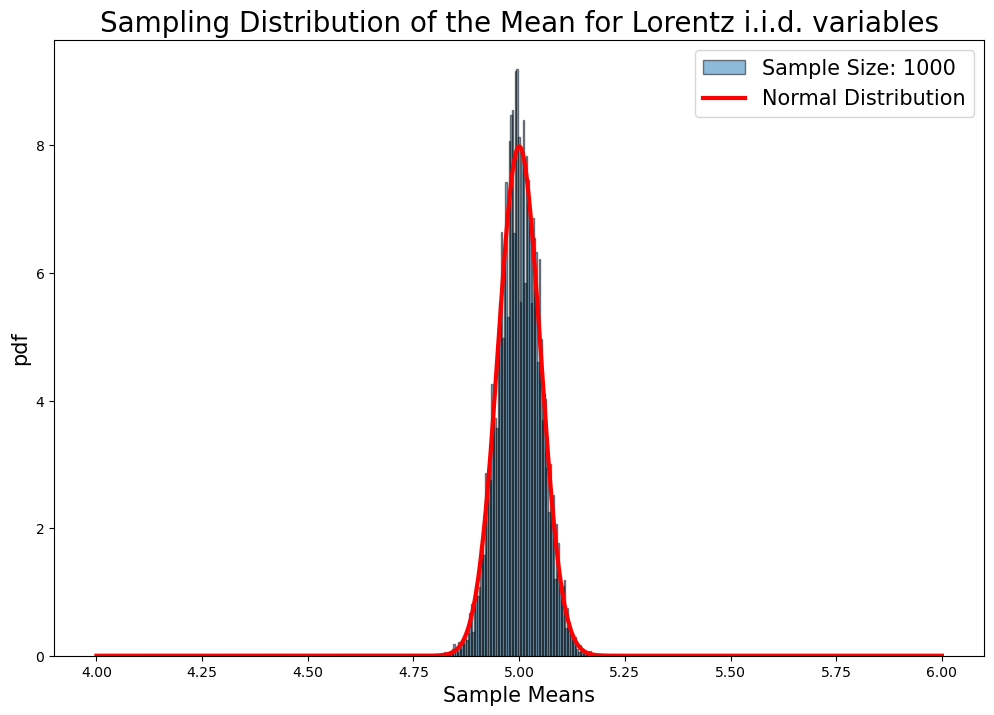

In [26]:
x = np.linspace(4, 6, 10000)
y = stats.norm.pdf(x, loc = np.mean(pop_binom), scale = np.std(sample_means_binom))

plt.figure(figsize = (12, 8))
plt.hist(sample_means_binom, bins = 100, alpha = 0.5, label = "Sample Size: 1000", density= True,ec = "black")
plt.plot(x, y, color = "red", linewidth = 3, label = "Normal Distribution")
plt.title("Sampling Distribution of the Mean for Lorentz i.i.d. variables", fontsize = 20)
plt.xlabel("Sample Means", fontsize = 15)
plt.ylabel("pdf", fontsize = 15)
plt.legend(fontsize = 15)
plt.show()

## Plots of the Gaussian pdf/cdf etc

Here we plot the __absolute frequency__ for the distribution

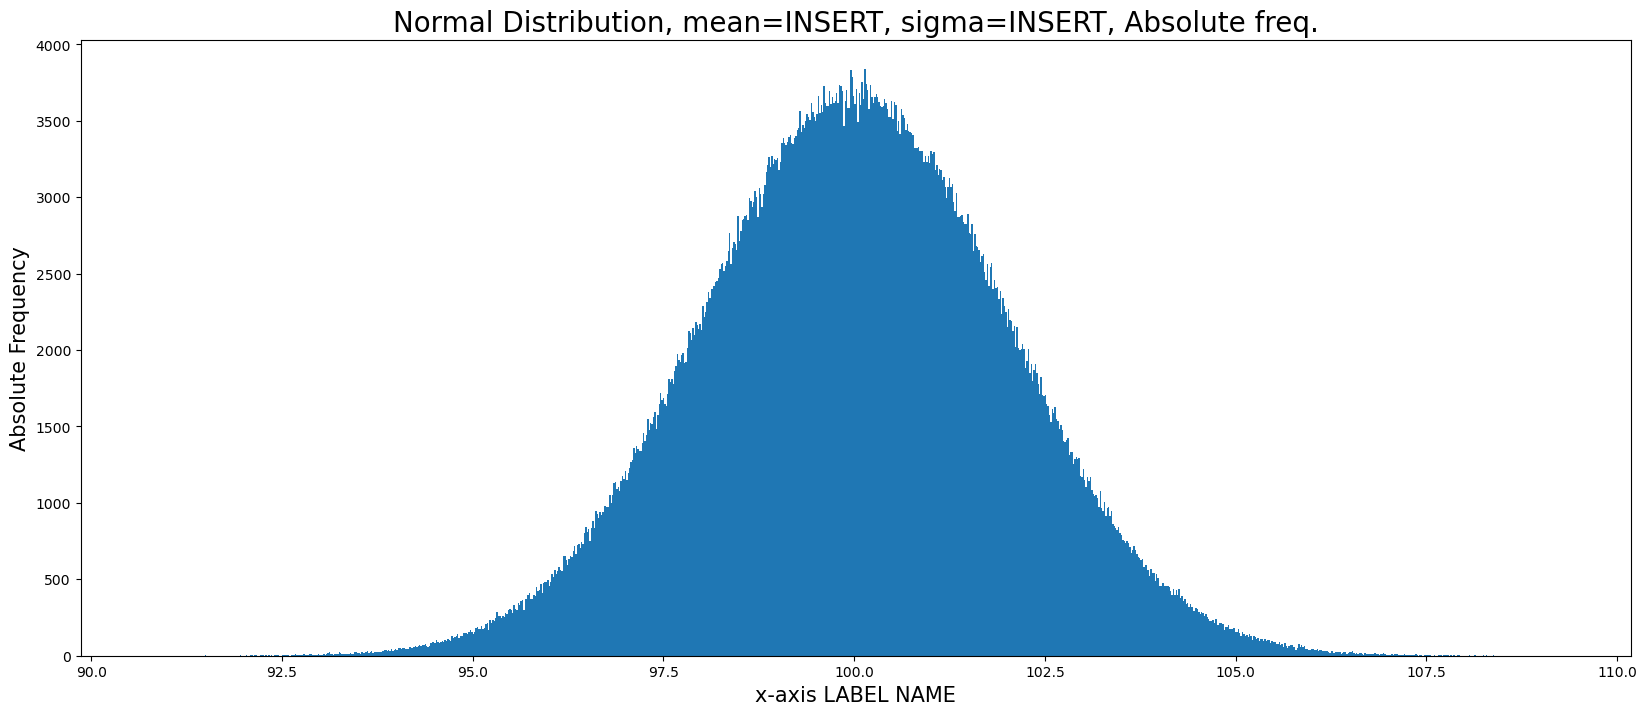

In [27]:
plt.figure(figsize = (20, 8))
plt.hist(pop, bins = 1000)
plt.title("Normal Distribution", fontsize = 20)
plt.xlabel("x-axis", fontsize = 15)
plt.ylabel("Absolute Frequency", fontsize = 15)
plt.show()

Here we plot the __pdf__ for the distribution

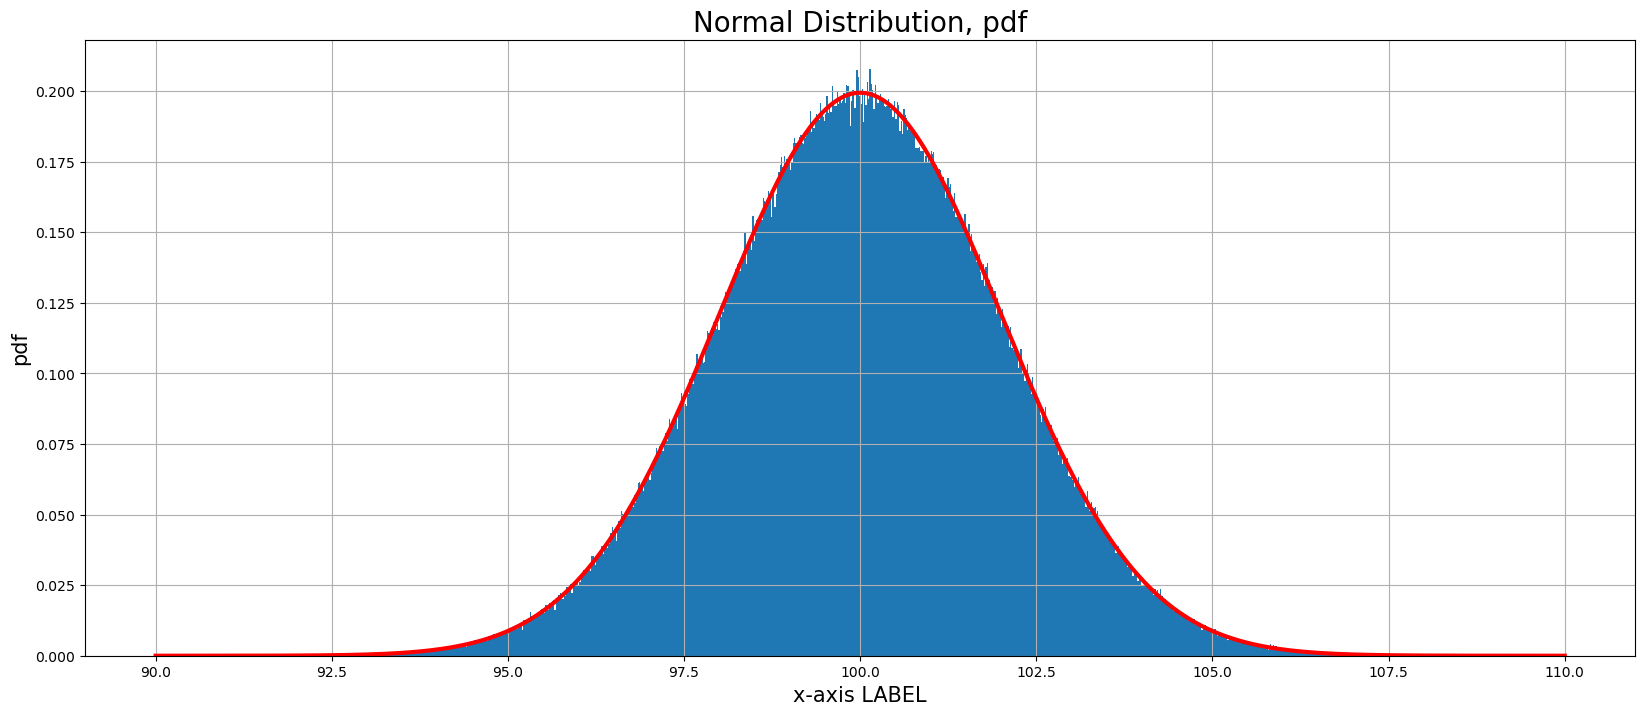

In [28]:
x = np.linspace(90, 110, 1000)  #Create 1000 equally distributed numbers from 90 to 110, i.e. around the mean
y = stats.norm.pdf(x, loc = mu, scale = sigma)

plt.figure(figsize = (20, 8))
plt.hist(pop, bins = 1000, density = True)  #note the command density is turned on
plt.plot(x, y, linewidth = 3, color = "red")
plt.grid()
plt.title("Normal Distribution, pdf", fontsize = 20)
plt.xlabel("x-axis LABEL", fontsize = 15)
plt.ylabel("pdf", fontsize = 15)
plt.show()

Here we plot the __cdf__ for the distribution

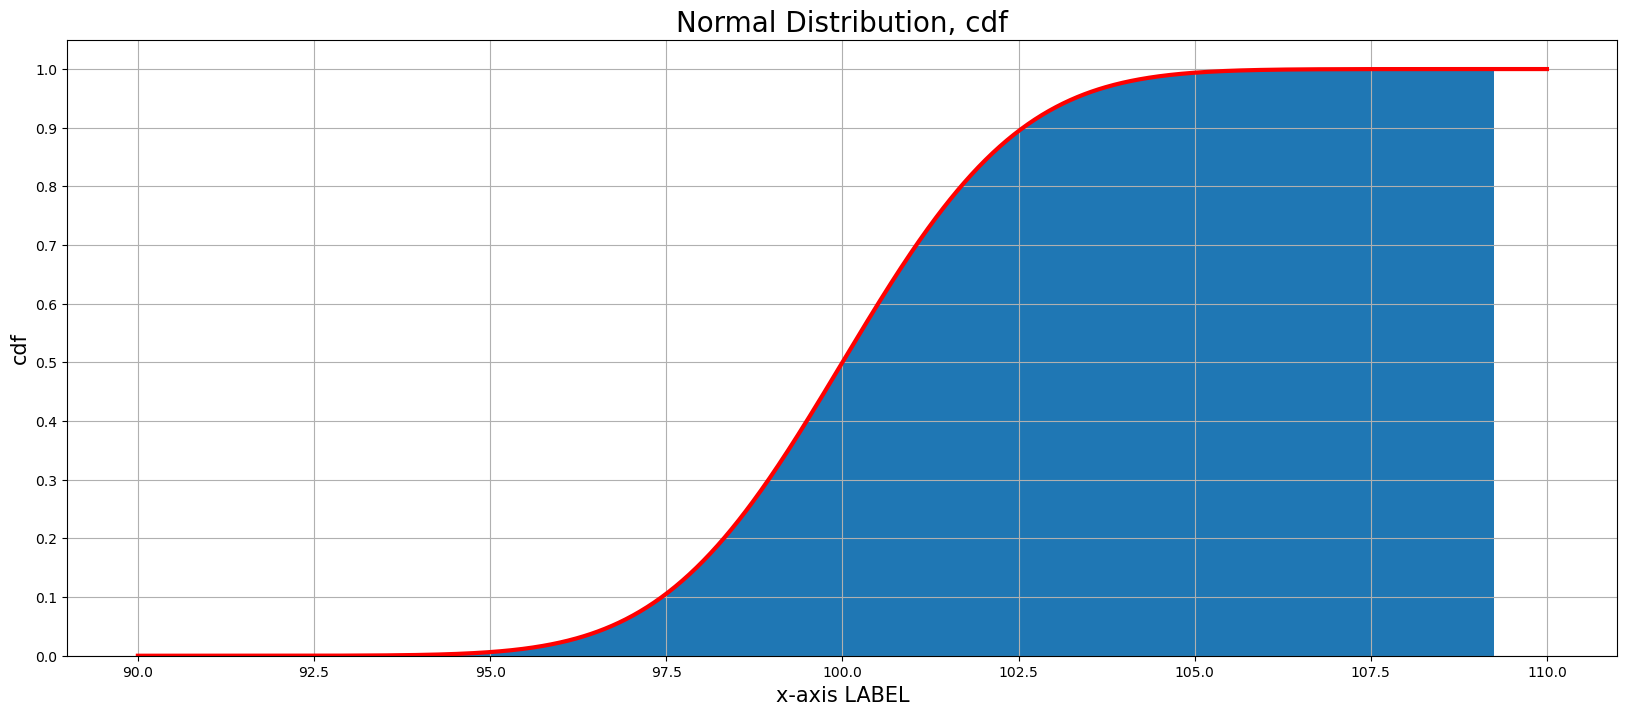

In [29]:
x = np.linspace(90, 110, 1000)
y = stats.norm.cdf(x, loc = mu, scale = sigma)  #Note here the y is defined as cdf of the x!


plt.figure(figsize = (20, 8))
plt.hist(pop, bins = 1000, density= True, cumulative= True)
plt.plot(x, y, color = "red", linewidth = 3)
plt.grid()
plt.title("Normal Distribution, cdf", fontsize = 20)
plt.xlabel("x-axis LABEL", fontsize = 15)
plt.ylabel("cdf", fontsize = 15)
plt.yticks(np.arange(0, 1.1, 0.1))
plt.show()

# Z score

We compute the z-score (i.e. a measure of the distance in units of $\sigma$)
\begin{equation}
z = \frac{x - \mu}{\sigma}
\end{equation}

Note that we can vectorise the procedure thanks to the NumPy array

In [30]:
(pop - mu) / sigma

array([-1.0856306 ,  0.99734545,  0.2829785 , ..., -0.84768045,
       -0.73819061, -1.29277267])

In [31]:
z_pop = stats.zscore(pop)    #This function "zscore" makes all this automatically, by just giving the population!
z_pop

array([-1.08597932,  0.99645831,  0.28227601, ..., -0.84809067,
       -0.73862914, -1.29306785])

In [32]:
round(z_pop.mean(), 6) #We take the z-score of the population and we check its mean (is close to zero)

0.0

In [33]:
z_pop.std() #Since it is normalised, should have 1 as standard deviation

0.9999999999999999

In [34]:
stats.describe(z_pop)

DescribeResult(nobs=1000000, minmax=(-4.606568367247727, 4.625754435848528), mean=1.1418967105214506e-14, variance=1.0000010000009998, skewness=0.0002286155024441295, kurtosis=-0.005837588254299586)

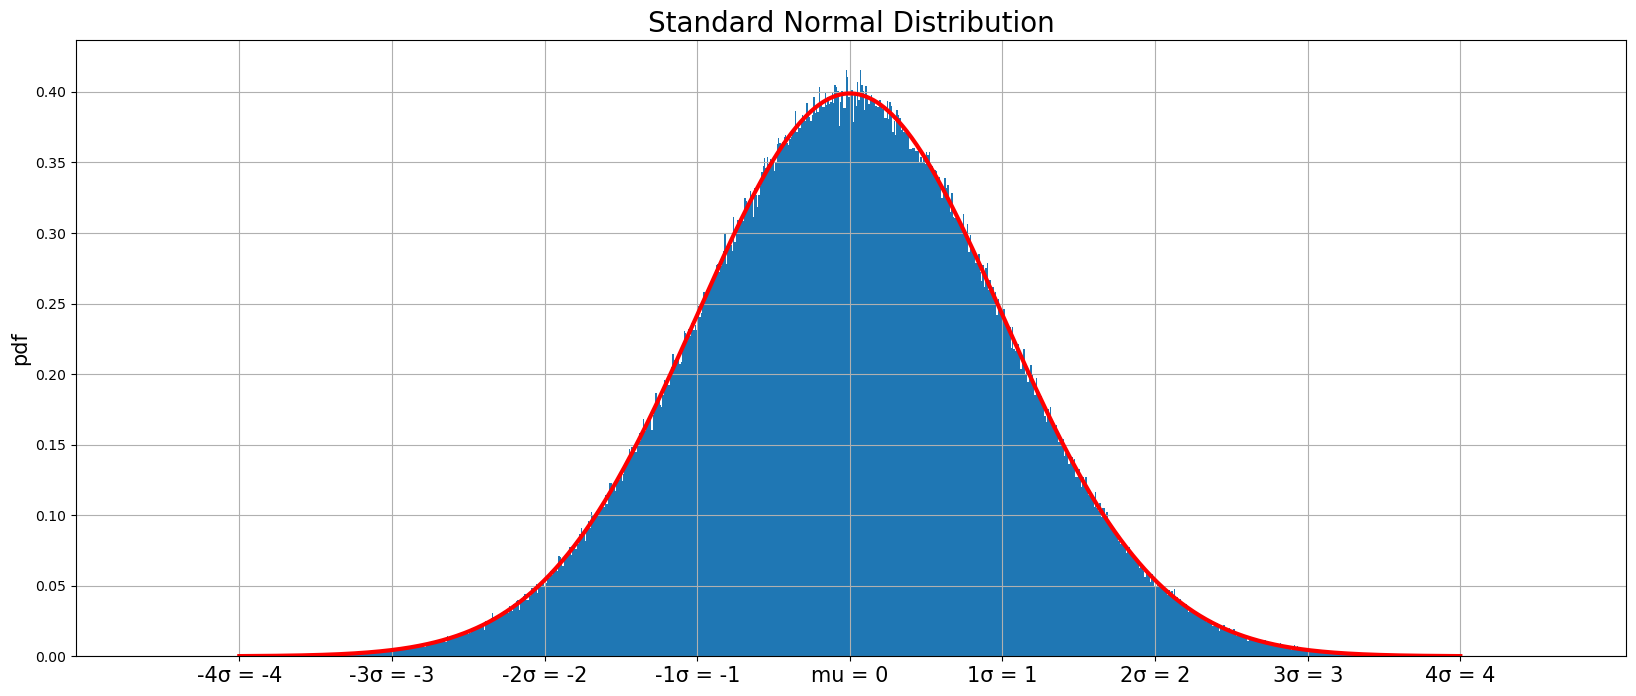

In [35]:
x = np.linspace(-4, 4, 1000)
y = stats.norm.pdf(x, loc = 0, scale = 1)

plt.figure(figsize = (20, 8))
plt.hist(z_pop, bins = 1000, density= True)
plt.grid()
plt.plot(x, y, linewidth = 3, color = "red")
plt.xticks(np.arange(-4, 5, 1),
           labels = ["-4σ = -4", "-3σ = -3", "-2σ = -2", "-1σ = -1", "mu = 0", "1σ = 1", "2σ = 2", "3σ = 3", "4σ = 4"],
           fontsize = 15)
plt.title("Standard Normal Distribution", fontsize = 20)
plt.ylabel("pdf", fontsize = 15)
plt.show()

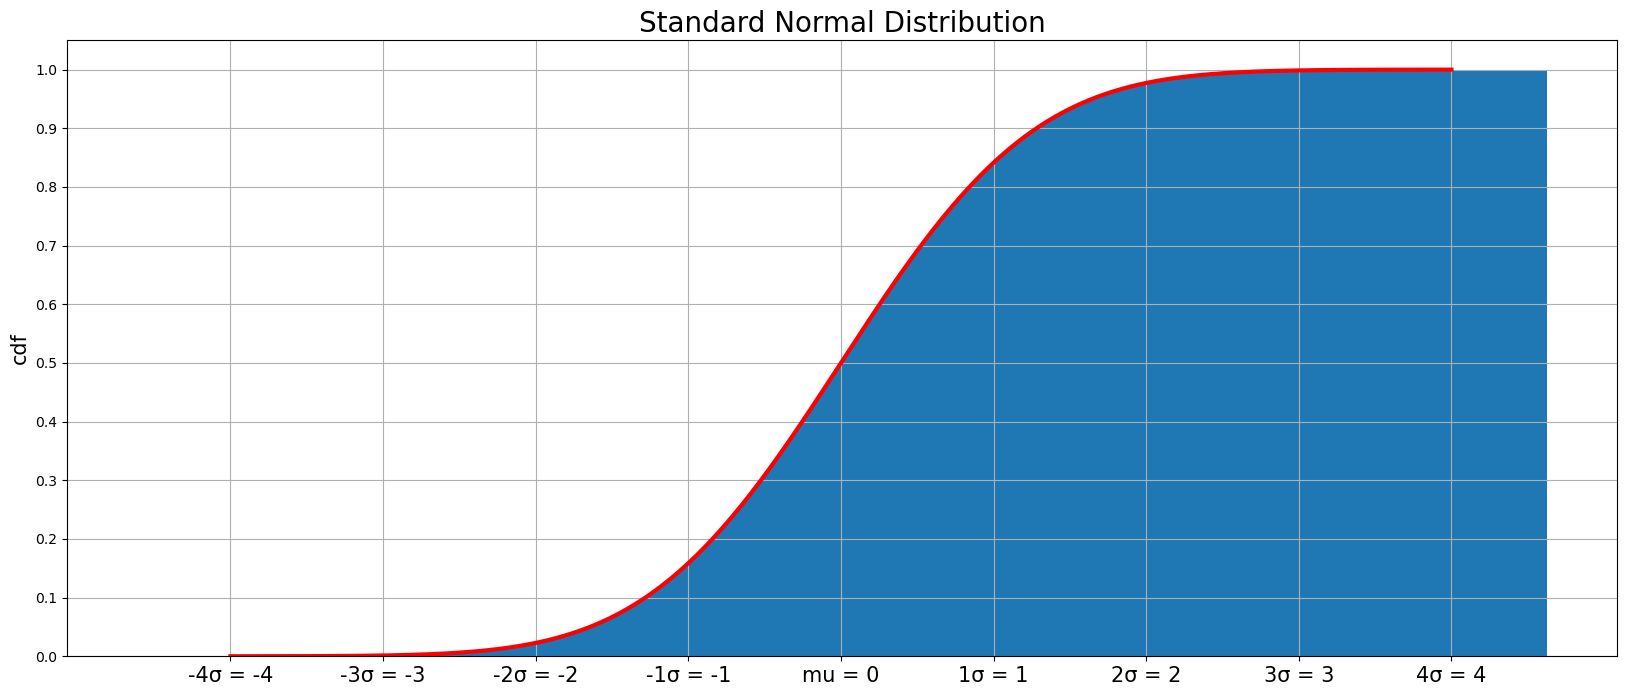

In [36]:
y = stats.norm.cdf(x)

plt.figure(figsize = (20, 8))
plt.hist(z_pop, bins = 1000, density= True, cumulative= True)
plt.plot(x, y, color = "red", linewidth = 3)
plt.grid() 
plt.xticks(np.arange(-4, 5, 1),
           labels = ["-4σ = -4", "-3σ = -3", "-2σ = -2", "-1σ = -1", "mu = 0", "1σ = 1", "2σ = 2", "3σ = 3", "4σ = 4"],
           fontsize = 15)
plt.yticks(np.arange(0, 1.1, 0.1))
plt.title("Standard Normal Distribution", fontsize = 20)
plt.ylabel("cdf", fontsize = 15)
plt.show()

# Z score and probabilities

The cumulative distribution function below computes the probability that a number falls before 1 std, i.e. on the left of -$\sigma$ (hence the -1). 

Look also at the previous graph and you will recognise that the y is ~0.16 when x = -$\sigma$. Of course, the probability of a number to fall after $-\sigma$ is $1-\text{what we computed}$

In [37]:
stats.norm.cdf(-1, loc = 0, scale = 1)    

0.15865525393145707

In [38]:
stats.norm.cdf(1) #Probability of a number having a value equal or less than one sigma (all the area up to +sigma)

0.8413447460685429

Below: $P(x \in [-\sigma,+\sigma]) = 0.683$

In [39]:
stats.norm.cdf(1) - stats.norm.cdf(-1) #between -1 sigma and 1 sigma

0.6826894921370859

The probability of obtaining a number before $- 2 \sigma$

In [40]:
stats.norm.cdf(-2) #i.e. all the area before x = -2 sigma

0.022750131948179195

In [41]:
stats.norm.cdf(5) #i.e. all the area before x = +5 sigma

0.9999997133484281

In [42]:
stats.norm.cdf(2) - stats.norm.cdf(-2) #Confidence interval (~95%) for x between - 2sigma and + 2 sigma 

0.9544997361036416

In [43]:
number_before_minustwosigma = pop.mean() - 2 * pop.std()  #i.e. the distance from 0 (the mean) to -2 sigma
number_before_minustwosigma

96.00022478820628

Relative frequency of a number that has a value of less than 96: we check every element in the array 'pop' and we demand it to be less than 96

In [44]:
(pop < number_before_minustwosigma).mean()

0.022783

Probability of producing a number with value 105 (or even more): 1 minus the area that goes all the way up to x=105 (and you do this with the cumulative distr. function)

In [45]:
1 - stats.norm.cdf(x = 105, loc = pop.mean(), scale = pop.std())

0.006232059327051176

The observation 105 is ~2.5 std away from the mean

In [46]:
z_105 = (105-pop.mean()) / pop.std()
z_105

2.4987244444868786

In [47]:
stats.norm.cdf(z_105)  #The probab of getting a number smaller than 105

0.9937679406729488

# ppf vs cdf

ppf is the inverse of cdf! you define the probability (say 0.5) and you get the $z_0$ value (in units of sigma)!

In the first example below we find the $z_0$ (in units of $\sigma$) such that
\begin{equation}
z_0 \text{ s.t.  } \; P(z\le z_0) = \int_{-\infty}^{z_0} N_{\mu = 0, \sigma = 1}(z) dz = 50\% \, ,
\end{equation}
which we know (by definition of $z$) to be equal to $0$. The function ppf inverts this integral to find $z_0$.

In [48]:
stats.norm.ppf(0.5, loc = 0, scale = 1)

0.0

In [49]:
stats.norm.ppf(0.05) #The value of z0 such that all the area before z0 is 0.05 (in units of sigma)

-1.6448536269514729

In [50]:
stats.norm.ppf(0.95) #95% likely that we get values equal or less than 1.64 std away from the mean

1.6448536269514722

All of the above is defined when we are using z. What about a distributions with generic $\mu$ and $\sigma$?

We can do it as follows! (I have checked the results in Mathematica)

\begin{equation}
x_0 \text{ s.t.  } \; P(x\le x_0) = \int_{-\infty}^{x_0} N_{\mu, \sigma}(x) dx = 5\% \, ,
\end{equation}

In [51]:
stats.norm.ppf(loc = pop.mean(), scale = pop.std(), q = 0.05) 

96.71070118305138

In [52]:
stats.norm.ppf(loc = pop.mean(), scale = pop.std(), q = 0.95)

103.29181682217798

### Confidence Intervals

The ABC Company produces screws. The length of the screws follows a __Normal Distribution__ with __mean 100__ (millimeters) and __standard deviation 2__ (millimeters). Determine the __Confidence Interval__ around the mean where __90%__ of all observations can be found.


In [53]:
conf = 0.90   #90% confidence around the mean

In [54]:
tails = (1-conf) / 2   #5% on the left tail and the other 5% on the right tail
tails

0.04999999999999999

In [55]:
left = stats.norm.ppf(tails)     #Is the left boundary x value (i.e. before which we are in the left tail)
left

-1.6448536269514729

In [56]:
right = stats.norm.ppf(1-tails) #Is the right boundary x value (i.e. after which we are in the right tails)
right

1.6448536269514722

In [57]:
stats.norm.interval(conf) #How to determine the confidence interval in one line (for std = 1, mean = 0)!

(-1.6448536269514729, 1.6448536269514722)

In [58]:
left, right = stats.norm.interval(conf)

In [59]:
left

-1.6448536269514729

In [60]:
right

1.6448536269514722

In [61]:
x = np.linspace(-5, 5, 1000)

In [62]:
y = stats.norm.pdf(x)

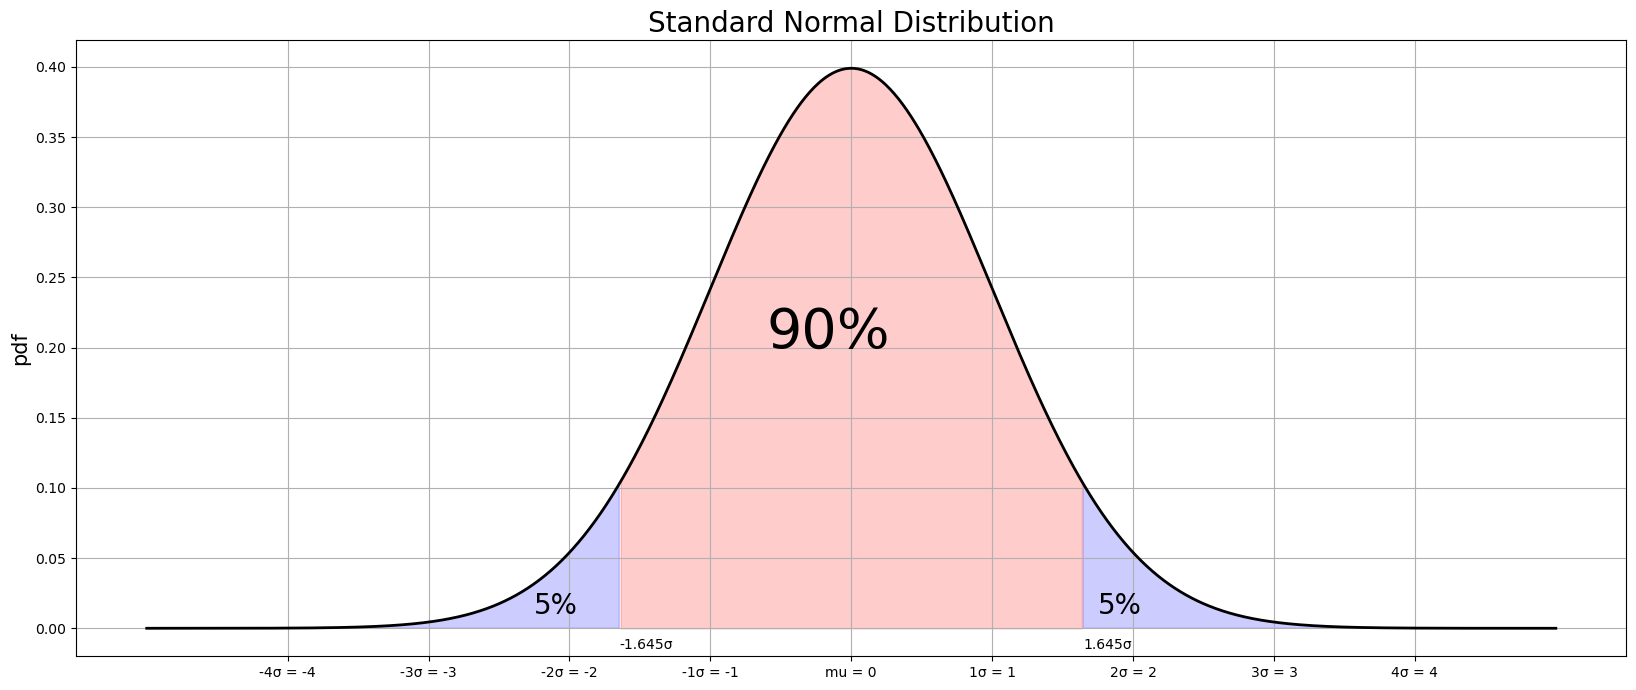

In [63]:
plt.figure(figsize = (20, 8))
plt.plot(x, y, color = "black", linewidth = 2)
plt.fill_between(x, y, where = ((x > right) | (x < left)), color = "blue", alpha = 0.2)
plt.fill_between(x, y, where = ((x < right) & (x > left)), color = "red", alpha = 0.2)
plt.grid()
plt.annotate("5%", xy = (1.75, 0.01), fontsize = 20)
plt.annotate("5%", xy = (-2.25, 0.01), fontsize = 20)
plt.annotate("90%", xy = (-0.6, 0.2), fontsize = 40)
plt.annotate("-1.645σ", xy = (-1.645, -0.015), fontsize = 10)
plt.annotate("1.645σ", xy = (1.645, -0.015), fontsize = 10)
plt.xticks(np.arange(-4, 5, 1), 
           labels = ["-4σ = -4", "-3σ = -3", "-2σ = -2", "-1σ = -1", "mu = 0", "1σ = 1", "2σ = 2", "3σ = 3", "4σ = 4"],
           fontsize = 10)
plt.title("Standard Normal Distribution", fontsize = 20)
plt.ylabel("pdf", fontsize = 15)
plt.show()

In [64]:
x = np.linspace(-5, 5, 1000)   #1000 equally distanced points between -5 and 5

In [65]:
y = stats.norm.cdf(x)   

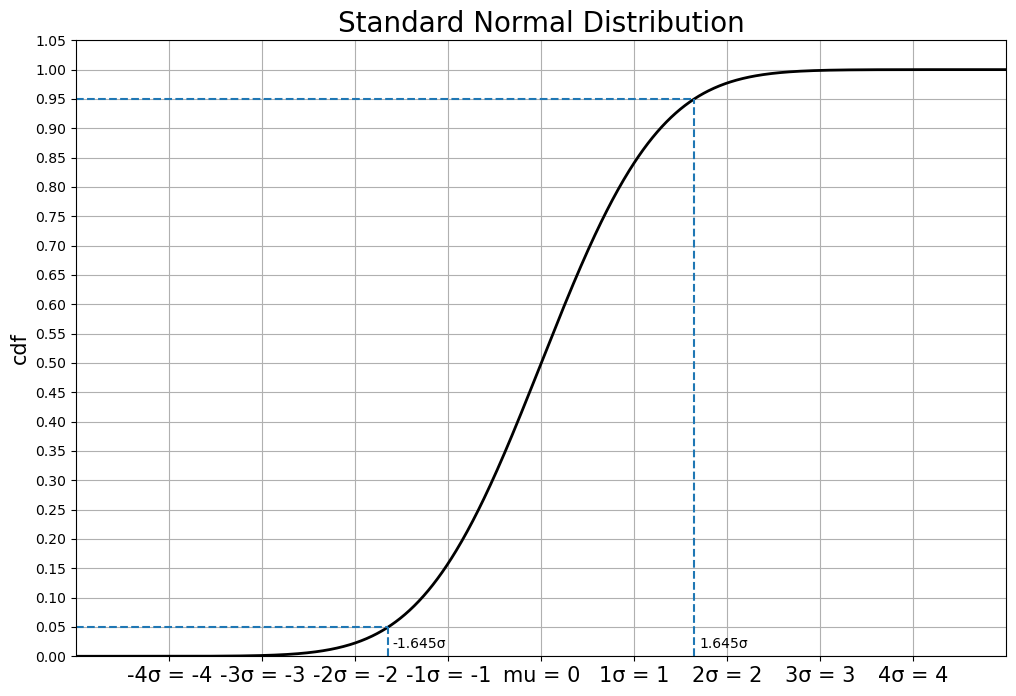

In [66]:
plt.figure(figsize = (12, 8))
plt.margins(x = 0, y = 0)
plt.plot(x, y, color = "black", linewidth = 2)
plt.vlines(x = [left, right], ymin = 0, ymax = [stats.norm.cdf(left), stats.norm.cdf(right)], linestyle = "--")
plt.hlines(y = [stats.norm.cdf(left), stats.norm.cdf(right)], xmin = -5, xmax = [left, right], linestyle = "--")
plt.grid()
plt.xticks(np.arange(-4, 5, 1), 
           labels = ["-4σ = -4", "-3σ = -3", "-2σ = -2", "-1σ = -1", "mu = 0", "1σ = 1", "2σ = 2", "3σ = 3", "4σ = 4"],
           fontsize = 15)
plt.yticks(np.arange(0, 1.1, 0.05), fontsize = 10)
plt.annotate("-1.645σ", xy = (-1.60, 0.015), fontsize = 10)
plt.annotate("1.645σ", xy = (1.7, 0.015), fontsize = 10)
plt.title("Standard Normal Distribution", fontsize = 20)
plt.ylabel("cdf", fontsize = 15)
plt.show()

In [67]:
stats.norm.interval(conf, loc = 100, scale = 2)    #Confidence interval but centered around 100 and std=2!!

(96.71029274609705, 103.28970725390295)

In [68]:
pop

array([ 97.82873879, 101.99469089, 100.565957  , ...,  98.3046391 ,
        98.52361877,  97.41445466])

In [69]:
left, right = np.percentile(pop, [5, 95]) #Doing the same, but with the population

In [70]:
left 

96.70911446261361

In [71]:
right

103.29134575911688

## Exercises

In [72]:
# run the cell
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

1. __Simulate__ playing Roulette __10 times__ (equally likely outcomes from __0 to 36__). Use a __random seed of 123__. <br>
What is the value of the very first outcome?

In [73]:
np.random.seed(123)
np.random.randint(low = 0, high = 37, size = 10)

array([ 2, 28, 34, 17, 19, 22, 33, 32,  9, 32])

(result: 2)

2. __Simulate__ playing Roulette __1 million times__ (equally likely outcomes from __0 until 36__). Use a __random seed of 123__. __Save__ the results. <br>

In [74]:
np.random.seed(123)
Roul1M = np.random.randint(low = 0, high = 37, size = 1000000)

3. Create a __histogram__ with __absolute frequencies__ for the outcome of question 2. Select an __appropriate number of bins__. 

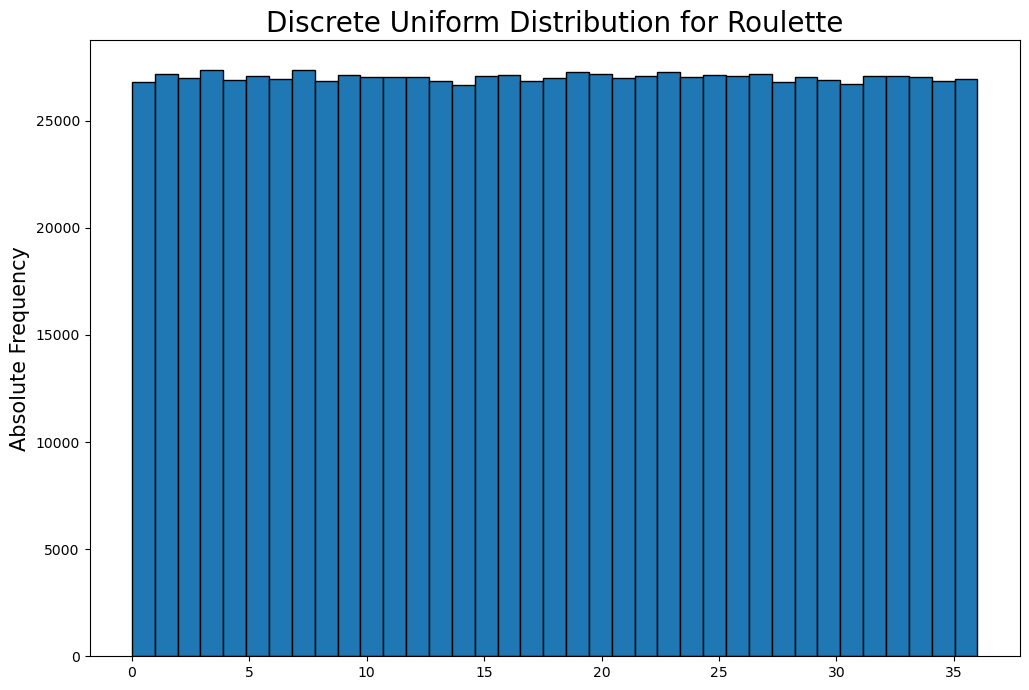

In [75]:
plt.figure(figsize = (12, 8))
plt.hist(Roul1M, bins = 37, ec = "black") #ec is edges around the bins
plt.title("Discrete Uniform Distribution for Roulette", fontsize = 20)
plt.ylabel("Absolute Frequency", fontsize = 15)
plt.show()

4. Create a __histogram__ with __relative frequencies__ for the outcome of question 2. Select an __appropriate number of bins__. 

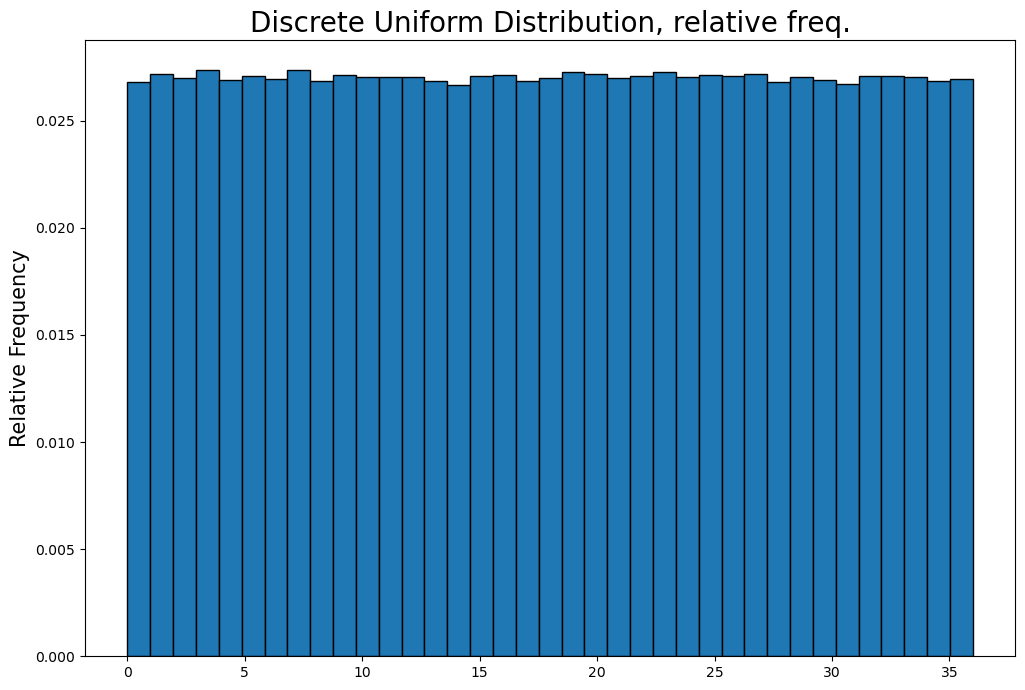

In [76]:
plt.figure(figsize = (12, 8))
plt.hist(Roul1M, bins = 37, weights = np.ones(len(Roul1M)) / len(Roul1M), ec = "black") #getting the relative frequency. Each observation has weight 1/100000
plt.title("Discrete Uniform Distribution, relative freq.", fontsize = 20)
plt.ylabel("Relative Frequency", fontsize = 15)
plt.show()

5. Let´s assume adult male heights in the US are on __average 70 inches__ with a __standard deviation of 4 inches__. Create an array with __1 million (random) observations__. Use a random __seed of 123__. __Save__ the results.

In [77]:
mu = 70
sigma = 4
size = 1000000

np.random.seed(123)
heights = np.random.normal(loc = mu, scale = sigma, size = size)

6. Create a __histogram__ with __absolute frequencies__ for the outcome of question 5. Use __1000 bins__. 

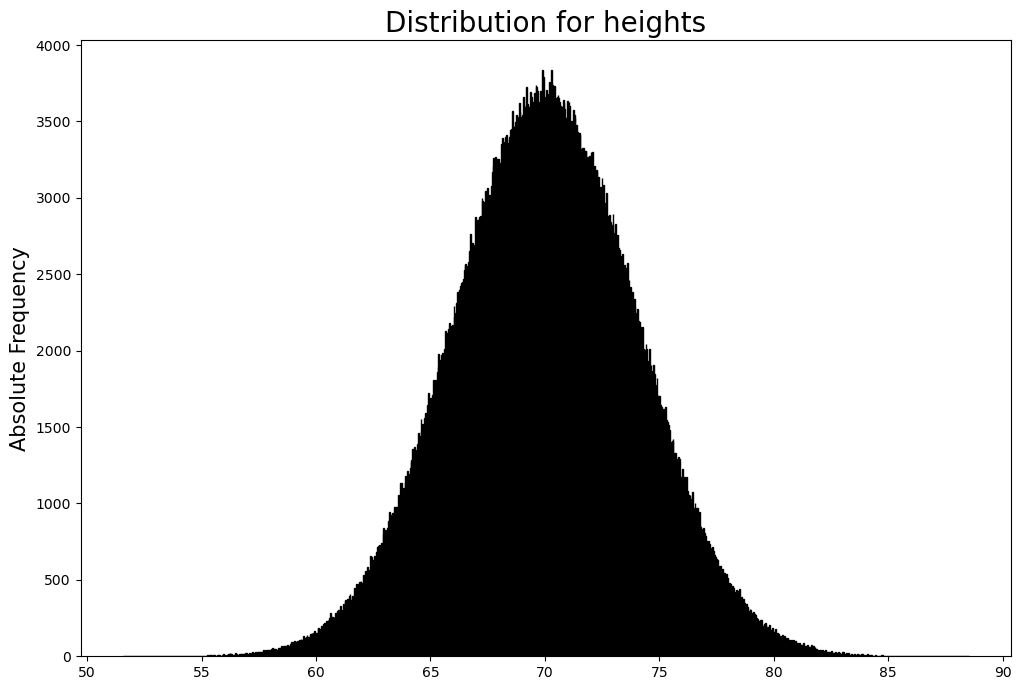

In [78]:
plt.figure(figsize = (12, 8))
plt.hist(heights, bins = 1000, ec = "black") #ec is edges around the bins
plt.title("Distribution for heights", fontsize = 20)
plt.ylabel("Absolute Frequency", fontsize = 15)
plt.show()

7. Adult women in the US are on average a bit shorter and less variable in height with a __mean height of 65 inches__ and __standard deviation of 3.5 inches__. <br>
Construct a __90% Confidence Interval__ around the mean. 

In [79]:
conf = 0.90
stats.norm.interval(conf, loc = 65, scale = 3.5)

(59.24301230566984, 70.75698769433015)

result: (59.24301230566984, 70.75698769433015)

8. __1%__ of all women in the US are __smaller than ... inches__? Calculate!

Need to find the $x_0$ such that $P(x \le x_0) = 0.01$ i.e.
\begin{equation}
x_0 \text{ s.t.  } \; \int_{-\infty}^{x_0} f(x) dx = 1\%
\end{equation}
In other words, the area under the left tail should be 0.01, and you need to find the $x_0$ that achieves this.

In [80]:
stats.norm.ppf(0.01, loc = 65, scale = 3.5) 
#1% of all the women are smaller than this value

56.85778244085706

(result: 56.85778244085706)

9. __2%__ of all women in the US are __taller than ... inches__? Calculate!

Need to find the $x_0$ such that $P(x \ge x_0) = 0.02$ i.e.
\begin{equation}
x_0 \text{ s.t.  } \; \int_{x_0}^{\infty} f(x) dx = 2\%
\end{equation}
which is equivalent to finding
\begin{equation}
x_0 \text{ s.t.  } \; \int_{-\infty}^{x_0} f(x) dx = 98\%
\end{equation}
To see this, use the fact that 
\begin{equation}
\int_{-\infty}^{x_0} f(x) dx + \int_{x_0}^{\infty} f(x) dx = 100\%
\end{equation}

In [81]:
stats.norm.ppf(1-0.02, loc = 65, scale = 3.5) 

72.18812118721138

(result: 72.18812118721138)

10. X percent of all women in the US are __taller than 70 inches__. Calculate!

Need to compute the area 
\begin{equation}
\int_{70}^{\infty} f_{\mu = 65,\sigma=3.5}(x) dx = ?
\end{equation}
We achieve this with the cumulative distribution function.

In [82]:
1-stats.norm.cdf(70, loc = 65, scale = 3.5) 

0.07656372550983481

(result: 0.07656372550983481)

11. Mary is __62.4 inches__ tall. How many standard deviations is she away from the mean (__z-score__)?

In [83]:
(62.4-65)/(3.5)

-0.7428571428571432